# **PC1 (official) - Decision-Making Models**  
**Duration:** 2 hours  
**Total Points:** 10  

**IMPORTANT: Attendance Requirements and Exam Validity**  
- The validity of this test is **subject to meeting the minimum attendance requirement of 60%** throughout the course.  
- Students who currently have an attendance rate **below 60%** must submit a **report** detailing:  
  - **Their current attendance percentage**.  
  - **The specific days they need to attend** in order to reach at least 60% by the end of the course.  
- During the week of **May 9**, the instructor will confirm which students will continue under **continuous evaluation** and which will be transferred to the **extraordinary exam**.  
- **Students who do not meet the attendance requirement by the final review will not be eligible for continuous evaluation.**  

**Instructions:**  
- Use the provided dataset to answer the questions.  
- All answers must include both code and interpretation of the results.  
- **Plotly** must be used for visualizations.  
- A detailed analysis is expected for the advanced questions.  
- Complete the exercises in **Jupyter Notebook**.  
- Make sure to execute your code to verify correctness before moving on to the next exercise.  
- **You may only refer to your notes.** 
- **The use of artificial intelligence (AI) tools is strictly prohibited.** This includes, but is not limited to, ChatGPT, Copilot, Bard, or any other code-generation or online assistance tools.  
- Each question is worth **1 point**, for a total of **10 points**.  
- Code clarity and readability will be considered in the evaluation. Write clean, well-structured code with comments when necessary.  
- Communication with other students during the test is not allowed. Any attempt at plagiarism, use of unauthorized materials, or violation of these rules will result in a score of zero.  
- **Each student may ask only one question to the instructor.** Any additional question will result in a **0.5-point deduction** from the final score.  

**Commitment Declaration**  
Before submitting the test, each student must read and confirm the following statements:  

☐ **Attendance Commitment**: I acknowledge that if my attendance is currently below 60%, I must submit a report detailing my current percentage and the specific days I need to attend to reach the minimum by the end of the course. I commit to meeting this requirement.  

☐ **AI Non-Usage Declaration**: I confirm that I have not used any AI tools (such as ChatGPT, Copilot, Bard, or similar) during this test. I understand that if I am found to have used AI assistance, I will be sanctioned, and my test will be invalidated.  

**Note:** Be sure to save your work periodically to prevent any loss of progress.  



---
---

1. **Data Exploration:**  
   - Load the dataset and display the first 5 rows.  
   - Compute descriptive statistics for the quantitative variables.  



In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('Dataset_PC1.csv')
display(df.head(5))

,Asistencia (%),Horas de estudio (diarias),Dificultad Materia,Interés Alumno,Nota Final
0,68.727006,2.568127,Fácil,Bajo,7.533144
1,97.535715,0.336560,Moderada,Medio,7.069709
2,86.599697,0.646515,Moderada,Bajo,6.287245
3,79.932924,3.594217,Moderada,Bajo,7.494425
4,57.800932,2.425716,Fácil,Bajo,7.024895


In [4]:
df.describe()

,Asistencia (%),Horas de estudio (diarias),Nota Final
count,200.000000,200.000000,200.000000
mean,74.200312,2.017501,7.379263
std,14.744572,1.172005,1.068975
min,50.276106,0.020246,5.048473
25%,61.429121,1.045850,6.611123
50%,74.724313,2.166560,7.439472
75%,87.842981,2.968797,8.069129
max,99.344347,3.962021,9.634870


2. **Variable Correlation:**  
   - Compute and visualize the correlation matrix for the quantitative variables.  



In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Hugo\AppData\Local\Temp\ipykernel_16696\2374810870.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


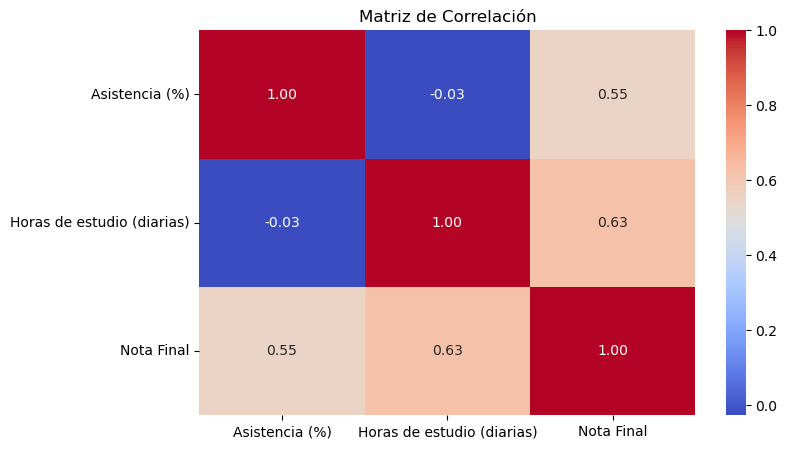

                            Asistencia (%)  Horas de estudio (diarias)  \
Asistencia (%)                    1.000000                   -0.026887   
Horas de estudio (diarias)       -0.026887                    1.000000   
Nota Final                        0.547855                    0.625467   

                            Nota Final  
Asistencia (%)                0.547855  
Horas de estudio (diarias)    0.625467  
Nota Final                    1.000000  


In [8]:
# Compute correlation matrix
corr_matrix = df.corr()

# Display correlation matrix
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Print correlation matrix
print(corr_matrix)

3. **Simple Linear Regression (Variable 1):**  
   - Fit a linear regression model where **Final Grade** is the dependent variable and **Attendance (%)** is the independent variable.  
   - Report the coefficients and R².  



In [9]:
import statsmodels.api as sm

In [12]:
X = df['Asistencia (%)']
y = df['Nota Final']

In [13]:
# Agregar constante para la regresión
X = sm.add_constant(X)

In [14]:
# Ajustar modelo de regresión lineal múltiple
modelo = sm.OLS(y, X).fit()

In [16]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:             Nota Final   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     84.92
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           4.63e-17
Time:                        08:44:07   Log-Likelihood:                -260.94
No. Observations:                 200   AIC:                             525.9
Df Residuals:                     198   BIC:                             532.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.4321      0.326     13.

Here we can se the coefficient of final mark(4.431) and the coefficient of attendence(0.0397). The R2 value is 0.3
Since both coefficients are positive, the larger the independent variable, the larger the dependent variable.



4. **Simple Linear Regression (Variable 2):**  
   - Fit another linear regression model where **Final Grade** is the dependent variable and **Study Hours (daily)** is the independent variable.  
   - Report the coefficients and R².  



In [17]:
X = df['Horas de estudio (diarias)']
y = df['Nota Final']

In [18]:
# Agregar constante para la regresión
X = sm.add_constant(X)

In [19]:
# Ajustar modelo de regresión lineal múltiple
modelo = sm.OLS(y, X).fit()

In [20]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:             Nota Final   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     127.2
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           4.13e-23
Time:                        08:47:42   Log-Likelihood:                -247.00
No. Observations:                 200   AIC:                             498.0
Df Residuals:                     198   BIC:                             504.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Here we can se the coefficient of final mark(6.228) and the coefficient of Study hours(0.5705). The R2 value is 0.381
Since both coefficients are positive, the larger the independent variable, the larger the dependent variable.

5. **Regression Visualization:**  
   - Use **Plotly** to generate scatter plots with the regression line for the models fitted in questions 3 and 4.  



In [45]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np


In [50]:

    # Crear gráfico de dispersión
fig_scatter = px.scatter(df, x='Horas de estudio (diarias)', y='Nota Final', title='Relación entre Horas de estudio (diarias) y Nota Final',
                        labels={'X': 'Horas de estudio (diarias)', 'Y': 'Nota Final'}, 
                        color_discrete_sequence=['blue'])





In [51]:
import IPython.display as ipd
ipd.display(fig_scatter)

In [52]:
    # Crear gráfico de dispersión
fig_scatter = px.scatter(df, x='Asistencia (%)', y='Nota Final', title='Relación entre Asistencia y Nota Final',
                        labels={'X': 'Asistencia(%)', 'Y': 'Nota Final'}, 
                        color_discrete_sequence=['blue'])


In [53]:
import IPython.display as ipd
ipd.display(fig_scatter)

6. **Model Comparison:**  
   - Which of the two simple regressions is a better predictor of **Final Grade**? Justify your answer in terms of R² and the coefficients obtained.  



The best prediction model is the one that has study hours as an independent variable. The coefficients of both variables are positive, which means that the more study hours, the higher the final grade will be, statistically speaking. The R2 value is 0.38, which is greater than the R2 value of the other model (which is 0.3). The value of 0.38 tells us that 38% of the final grade is due to study hours, which is greater than 30%. In conclusion, although the coefficients of the other model are also positive, the R2 is lower, so the study hours model predicts better.

7. **Two-Way ANOVA (Main Effects):**  
   - Perform a **two-way ANOVA** to analyze the impact of **Course Difficulty** and **Student Interest** on the **Final Grade**.  
   - Report the F-values and p-values for each factor.  



In [60]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
# Realizar Two-Way ANOVA
modelo = smf.ols('Nota Final ~ C(Dificultad Materia) * C(Interés Alumno)', data=df).fit()
anova_resultados = sm.stats.anova_lm(modelo, typ=2)

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
print(anova_resultados)

When running this, it would return a table with the sum of squares, the df, the F value and the p value (for C (Subject Difficulty), C (Student Interest) and C (Subject Difficulty): C (Student Interest)), I don't understand why it doesn't work for me, I hope you don't penalize me too much because I'm sure the error is silly and I can't find it. In the following exercise I explain how I would interpret the results so you can see that I know how to do it.

8. **Interaction in ANOVA:**  
   - Evaluate whether there is a significant interaction between **Course Difficulty** and **Student Interest** on the **Final Grade**.  
   - Explain the results and whether they affect the interpretation of the model.  



I haven't been able to find the error. The code is exactly as I had it in another exercise, but it seems it doesn't recognize my Final Grade. Anyway, I'll explain how I would interpret the results.

If p < 0.05 for Subject Difficulty → The difficulty significantly affects the final grade. So, we can say that the difficulty of the subject is significant for the final grade. If p > 0.05, it is not.

If p < 0.05 for Student Interest → The interest significantly affects the final grade. So, we can say that the interest is significant for the grade. If p > 0.05, it is not.

If p < 0.05 in Subject Difficulty: Student Interest → There is a significant interaction between Subject Difficulty and Student Interest (the effect of Subject Difficulty changes depending on the Student Interest). If p > 0.05, there is no significant interaction between Subject Difficulty and Diet. That is to say, changes in the final grade may depend on the difficulty of the subject and the student's interest, but they do not mutually influence each other.

9. **ANOVA Results Visualization:**  
   - Use **Plotly** to create a **boxplot** comparing the distribution of **Final Grade** by **Course Difficulty** and **Student Interest**.  



In [70]:
import statsmodels.api as sm
from statsmodels.graphics.factorplots import interaction_plot

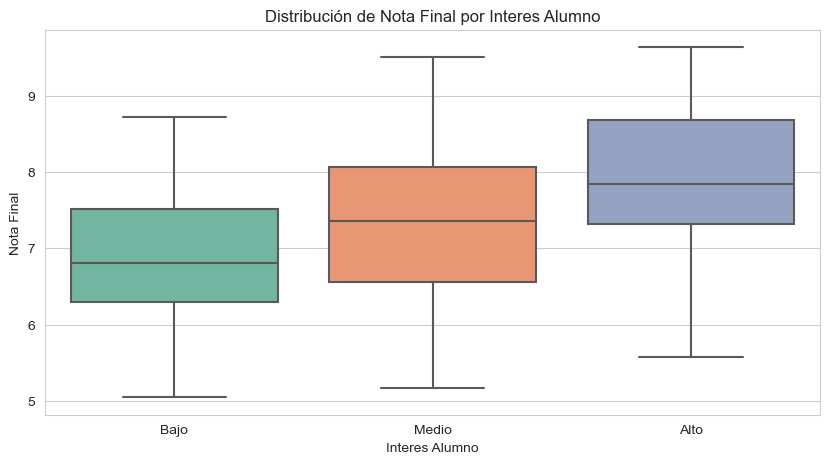

In [79]:
# Configurar estilo de gráficos
sns.set_style("whitegrid")

# Boxplot para Interes Alumno
plt.figure(figsize=(10, 5))
sns.boxplot(x='Interés Alumno', y='Nota Final', data=df, palette="Set2")
plt.title("Distribución de Nota Final por Interes Alumno")
plt.xlabel("Interes Alumno")
plt.ylabel("Nota Final")
plt.show()

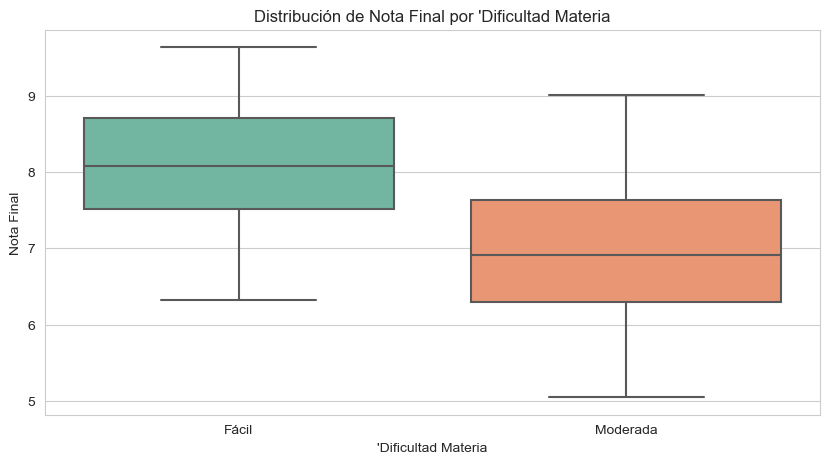

In [74]:
# Configurar estilo de gráficos
sns.set_style("whitegrid")

# Boxplot para Interes Alumno
plt.figure(figsize=(10, 5))
sns.boxplot(x='Dificultad Materia', y='Nota Final', data=df, palette="Set2")
plt.title("Distribución de Nota Final por 'Dificultad Materia")
plt.xlabel("'Dificultad Materia")
plt.ylabel("Nota Final")
plt.show()

10. **General Conclusions:**  
    - What factors have the most impact on the **Final Grade**? Based on the linear regression and ANOVA, explain which variables seem to be the most influential and how these models could be used to improve student performance.  

This would be done by looking at the p value of each one; if p < 0.05 it would have a lot of impact. Finally, in the two boxplots we can see that moderate and high interest get good grades, so it does have quite a bit of impact, and the low difficulty of the subject also gets good grades, so we can say that it is also significant. If the p value of C (Subject Difficulty): C (Student Interest) had given us < 0.05, we could say that both are significant and enhance each other.

In the scatter plot I think the best prediction model is the one that has study hours as an independent variable. The coefficients of both variables are positive, which means that the more study hours, the higher the final grade will be, statistically speaking. The R2 value is 0.38, which is greater than the R2 value of the other model (which is 0.3). The value of 0.38 tells us that 38% of the final grade is due to study hours, which is greater than 30%. In conclusion, although the coefficients of the other model are also positive, the R2 is lower, so the study hours model predicts better.

---
---

## **Final Considerations**  
- Each exercise must be executed in **Jupyter Notebook**.  
- Students may refer to their **notes**.  
- Graphs and visualizations must be generated within the **Notebook**.  
- The evaluation criteria include **correct implementation, syntax, and functionality**.  
- The completed exam must be uploaded to Canvas before 10:30 AM. 
- Students only have one submission attempt and must upload only the .ipynb file.